In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import time

In [2]:
'''counter clockwise direction is followed here'''
def trianglearea(a,b,c):
    '''
    inputs a,b,c as coordinates (xo,yo),(x1,y1),(x2,y2) and returns the area of triangle formed by these coordinates
    (ccw direction)
    '''
    area  = ((b[0]-a[0])*(c[1]-a[1]))-((c[0]-a[0])*(b[1]-a[1]))
    return area/2

In [4]:
def leftpredicate(a,b,c):
    Area=trianglearea(a,b,c)
    if Area>0:
        return True
    else:
        return False

In [5]:
def leftonpredicate(a,b,c):    
    Area=trianglearea(a,b,c)
    if Area>=0:
        return True
    else:
        return False

In [6]:
def collinear(a,b,c):
    Area = trianglearea(a,b,c)
    if Area==0:
        return True
    else:
        return False

In [7]:
def proper_intersection(a,b,c,d):
    if collinear(a,b,c) or collinear(a,b,d) or collinear(c,d,a) or collinear(c,d,b):
        return False
    else:
        m = leftpredicate(a,b,c)
        n = leftpredicate(a,b,d)
        o = leftpredicate(c,d,a)
        p = leftpredicate(c,d,b)
        if m!=n and o!=p:
            return True
        else:
            return False
        

In [8]:
def between(a,b,c):
    if not collinear(a,b,c):
        return False
    else:
        if a[0]!=b[0]:
            if (a[0] <=c[0] and c[0]<=b[0]) or (b[0] <=c[0] and c[0] <=a[0]):
                return True
            else:
                return False
        else:
            if (a[1] <=c[1] and c[1]<=b[1]) or (a[1] >=c[1] and c[1] >=b[1]):
                return True
            else:
                return False

In [9]:
def intersection(a,b,c,d):
    if (proper_intersection(a,b,c,d)):
        return True
    elif (between(a,b,c) or between(a,b,d) or between(c,d,a) or between(c,d,b))==True:
        return True
    else:
        return False

In [10]:
def diagonal_edge_intersection(b,c,poly):
    for j in range(len(poly)-1):
        if (poly[j]!=b) and (poly[j+1]!=b) and (poly[j]!=c) and (poly[j+1]!=c):
            if intersection(b,c,poly[j],poly[j+1]):
                return False
                break
    else:
        return True

In [11]:
def incone(x,y,nxt,prev):
    if leftonpredicate(x,nxt,prev):
        if leftpredicate(x,y,prev) and leftpredicate(y,x,nxt):
            return True
        else:
            return False
    else:
        return not (leftonpredicate(y,x,prev) and leftonpredicate(x,y,nxt))


In [12]:
def isDiagonal(a,b,c,d,e,poly):
    if incone(c,b,e,a) and incone(b,c,a,d) and diagonal_edge_intersection(b,c,poly)==True:
        return True
    else:
        return False

In [13]:
def isear(poly,a,b,c,d,e):
    if isDiagonal(a,b,c,d,e,poly):
        return True
    else:
        return False

In [27]:
'''To plot the polygon before and after triangulation'''
def plotpolygon(poly):
    poly=np.array(poly)
    fig, ax = plt.subplots()
    ax.plot(poly[:, 0], poly[:, 1])
    plt.show()

In [38]:
'''To calculate time complexity'''
num_vertices=[]
time_taken=[]

In [39]:
def triangulate(poly):
    triangles=[]
    while len(poly)>4:
        i=2
        while i < len(poly)-2:
            d=poly[i-2]
            b=poly[i-1]
            a=poly[i]
            c=poly[i+1]
            e=poly[i+2]
            if isear(poly,a,b,c,d,e):
                triangles.append([b,a,c])
                #print(f'Triangle found from iteration {i} is {[b,a,c]}')
                poly.remove(a)
                #print(f'Number of triangles found upto iteration {i}: {triangles}')
                i=2
                break
            else:   
                if len(poly)==5:
                    poly.append(poly[0])
                    poly.remove(poly[0])
                i=i+1
                    
    else:
            a=poly[2]
            b=poly[1]
            c=poly[3]
            d=poly[0]
            if isear(poly,a,b,c,d,d):
                triangles.append([b,a,c])
                triangles.append([d,b,c])
            else:
                triangles.append([d,b,a])
                triangles.append([d,a,c])
    print('\n')
    print(f'Total list of triangles is : {triangles}')
    triangles=np.array(triangles)
    triangles=triangles.reshape(3*triangles.shape[0],2)
    triangles = np.vstack((triangles,d))
    triangles = np.vstack((triangles,c))                
    return triangles

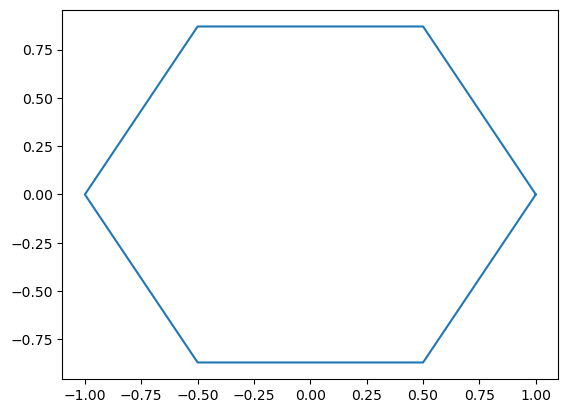



Total list of triangles is : [[[0.5, 0.87], [-0.5, 0.87], [-1, 0]], [[0.5, 0.87], [-1, 0], [-0.5, -0.87]], [[0.5, 0.87], [-0.5, -0.87], [0.5, -0.87]], [[1, 0], [0.5, 0.87], [0.5, -0.87]]]


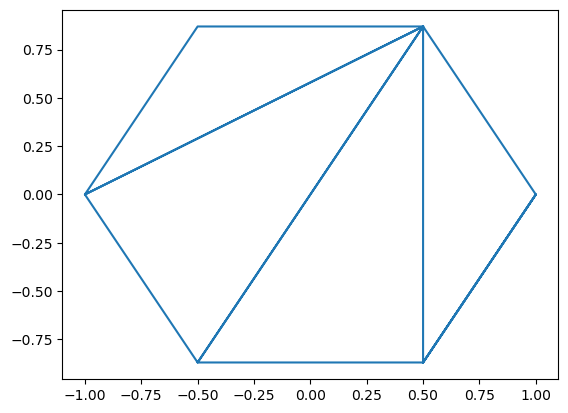

In [40]:
'''n=6'''
polygon=[[1,0], [0.5,0.87], [-0.5,0.87], [-1,0], [-0.5,-0.87], [0.5,-0.87]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

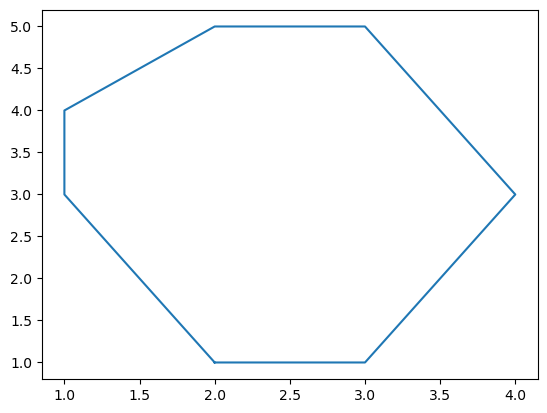

Triangle found from iteration 2 is [[3, 1], [4, 3], [3, 5]]
Number of triangles found upto iteration 2: [[[3, 1], [4, 3], [3, 5]]]
Triangle found from iteration 2 is [[3, 1], [3, 5], [2, 5]]
Number of triangles found upto iteration 2: [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]]]
Triangle found from iteration 2 is [[3, 1], [2, 5], [1, 4]]
Number of triangles found upto iteration 2: [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]], [[3, 1], [2, 5], [1, 4]]]
Triangle found from iteration 2 is [[3, 1], [1, 4], [1, 3]]
Number of triangles found upto iteration 2: [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]], [[3, 1], [2, 5], [1, 4]], [[3, 1], [1, 4], [1, 3]]]


Total list of triangles is : [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]], [[3, 1], [2, 5], [1, 4]], [[3, 1], [1, 4], [1, 3]], [[3, 1], [1, 3], [1.5, 2]], [[2, 1], [3, 1], [1.5, 2]]]


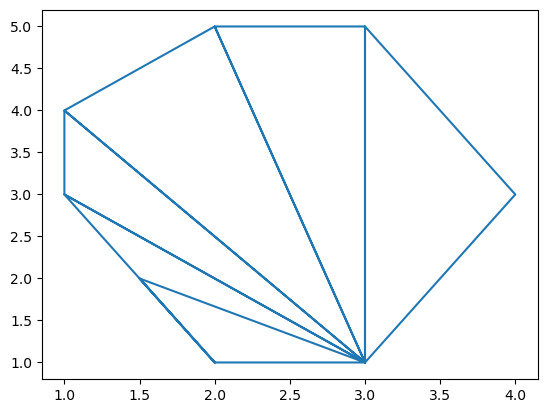

In [193]:
'''n=8'''
polygon=[[2,1],[3,1],[4,3],[3,5],[2,5],[1,4],[1,3],[1.5,2]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

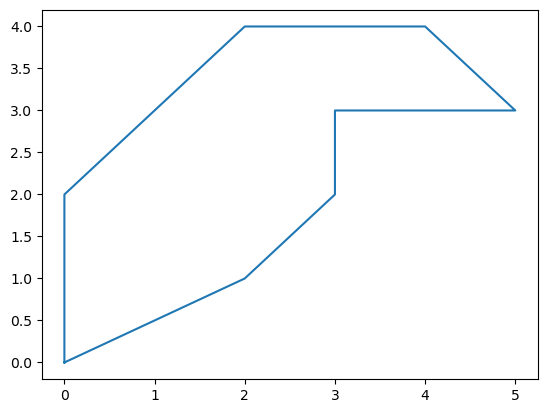



Total list of triangles is : [[[2, 1], [3, 2], [3, 3]], [[3, 3], [5, 3], [4, 4]], [[3, 3], [4, 4], [2, 4]], [[2, 1], [3, 3], [2, 4]], [[2, 1], [2, 4], [1, 3]], [[2, 1], [1, 3], [0, 2]], [[0, 0], [2, 1], [0, 2]]]


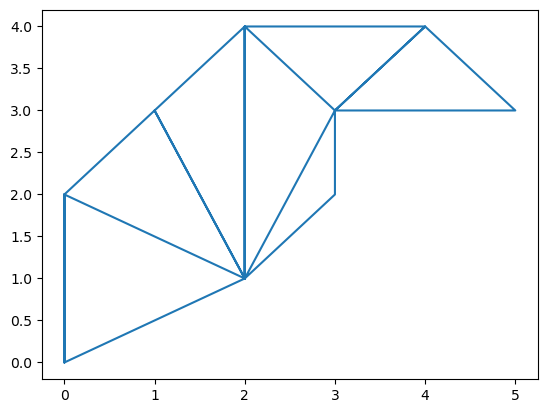

In [41]:
'''n=9'''
polygon=[[0,0],[2,1],[3,2],[3,3],[5,3],[4,4],[2,4],[1,3],[0,2]]
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

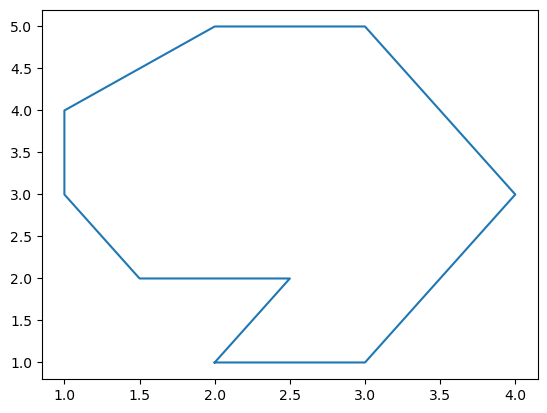

Triangle found from iteration 2 is [[3, 1], [4, 3], [3, 5]]
Number of triangles found upto iteration 2: [[[3, 1], [4, 3], [3, 5]]]
Triangle found from iteration 2 is [[3, 1], [3, 5], [2, 5]]
Number of triangles found upto iteration 2: [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]]]
Triangle found from iteration 3 is [[2, 5], [1, 4], [1, 3]]
Number of triangles found upto iteration 3: [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]], [[2, 5], [1, 4], [1, 3]]]
Triangle found from iteration 3 is [[2, 5], [1, 3], [1.5, 2]]
Number of triangles found upto iteration 3: [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]], [[2, 5], [1, 4], [1, 3]], [[2, 5], [1, 3], [1.5, 2]]]
Triangle found from iteration 3 is [[2, 5], [1.5, 2], [2, 2]]
Number of triangles found upto iteration 3: [[[3, 1], [4, 3], [3, 5]], [[3, 1], [3, 5], [2, 5]], [[2, 5], [1, 4], [1, 3]], [[2, 5], [1, 3], [1.5, 2]], [[2, 5], [1.5, 2], [2, 2]]]
Triangle found from iteration 2 is [[2, 5], [2, 2], [2.5, 2]]
Number of tri

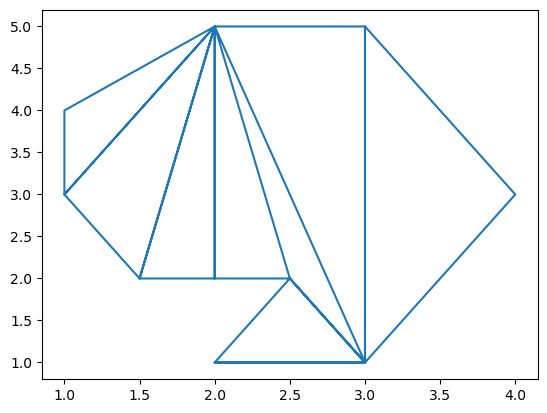

In [195]:
'''n=10'''
polygon=[[2,1],[3,1],[4,3],[3,5],[2,5],[1,4],[1,3],[1.5,2],[2,2],[2.5,2]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

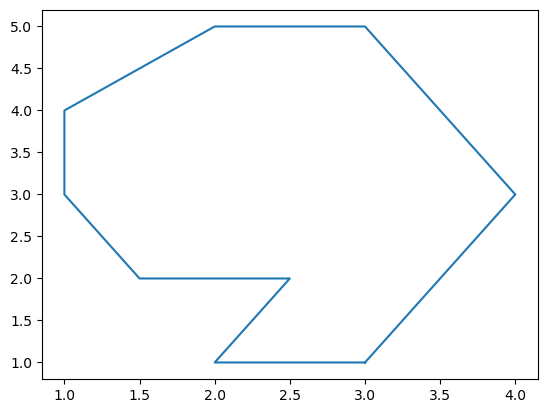



Total list of triangles is : [[[4, 3], [3, 5], [2, 5]], [[4, 3], [2, 5], [1, 4]], [[4, 3], [1, 4], [1, 3]], [[4, 3], [1, 3], [1.5, 2]], [[4, 3], [1.5, 2], [2, 2]], [[4, 3], [2, 2], [2.5, 2]], [[4, 3], [2.5, 2], [2, 1]], [[3, 1], [4, 3], [2, 1]]]


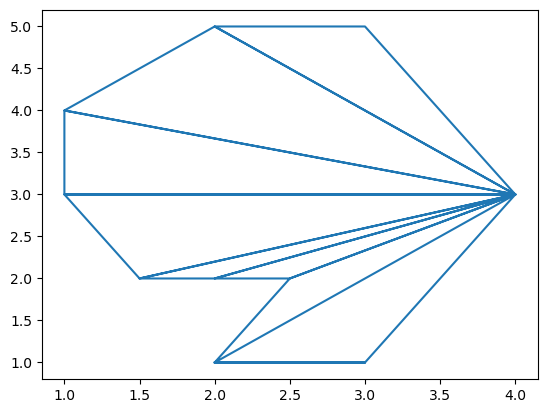

In [42]:
'''Above polygon triangulated with different order of coordinates'''
polygon=[[3,1],[4,3],[3,5],[2,5],[1,4],[1,3],[1.5,2],[2,2],[2.5,2],[2,1]]
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
triangle=triangulate(polygon)
plotpolygon(triangle)

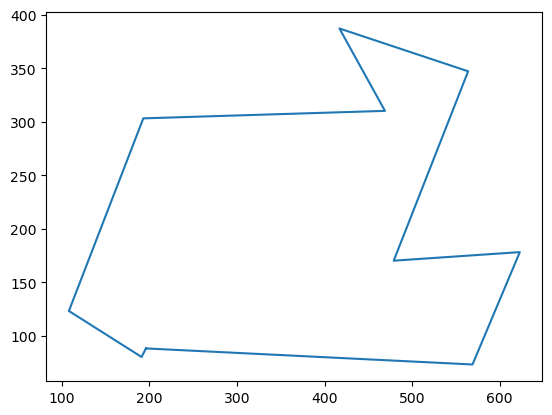



Total list of triangles is : [[[569, 73], [623, 178], [479, 170]], [[564, 347], [417, 387], [469, 310]], [[479, 170], [564, 347], [469, 310]], [[479, 170], [469, 310], [193, 303]], [[569, 73], [479, 170], [193, 303]], [[569, 73], [193, 303], [108, 123]], [[196, 88], [569, 73], [108, 123]], [[196, 88], [108, 123], [191, 80]]]


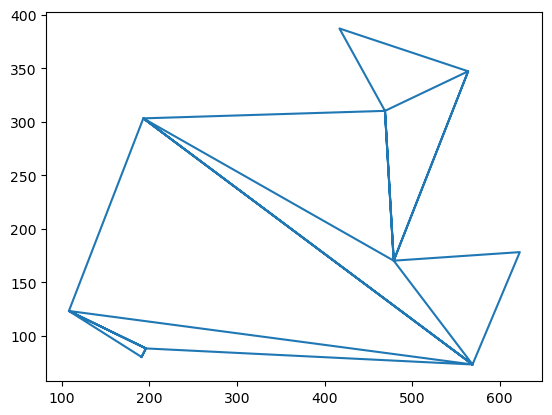

In [43]:
'''n=10'''
polygon=[[196, 88],[569, 73],[623, 178],[479, 170],[564, 347],[417, 387],[469,310],[193, 303],[108, 123],[191, 80]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

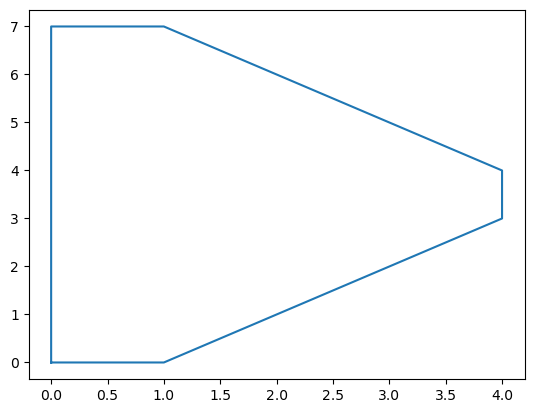



Total list of triangles is : [[[3, 2], [4, 3], [4, 4]], [[2, 1], [3, 2], [4, 4]], [[1, 0], [2, 1], [4, 4]], [[1, 0], [4, 4], [3, 5]], [[1, 0], [3, 5], [2, 6]], [[1, 0], [2, 6], [1, 7]], [[1, 0], [1, 7], [0, 7]], [[0, 0], [1, 0], [0, 7]]]


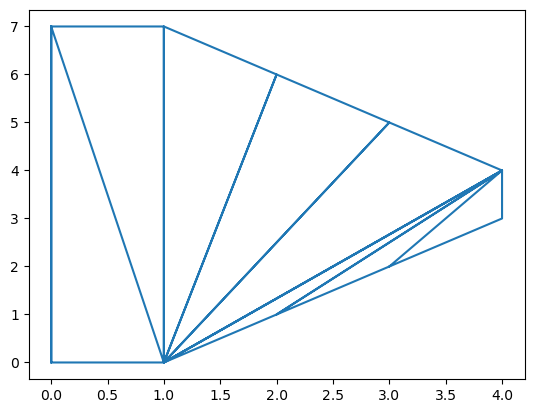

In [48]:
'''n=10'''
polygon=[[0,0],[1,0],[2,1],[3,2],[4,3],[4,4],[3,5],[2,6],[1,7],[0,7]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

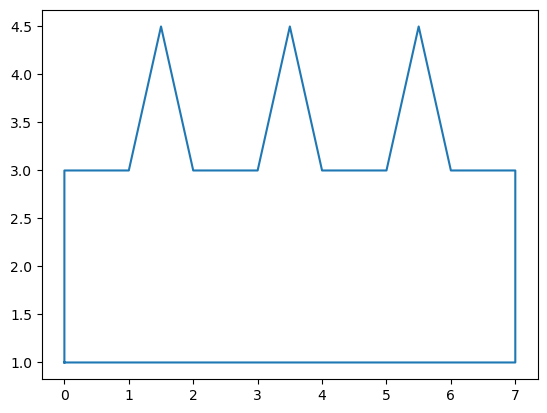



Total list of triangles is : [[[7, 1], [7, 3], [6, 3]], [[6, 3], [5.5, 4.5], [5, 3]], [[7, 1], [6, 3], [5, 3]], [[7, 1], [5, 3], [4, 3]], [[4, 3], [3.5, 4.5], [3, 3]], [[7, 1], [4, 3], [3, 3]], [[7, 1], [3, 3], [2, 3]], [[2, 3], [1.5, 4.5], [1, 3]], [[7, 1], [2, 3], [1, 3]], [[7, 1], [1, 3], [0, 3]], [[0, 1], [7, 1], [0, 3]]]


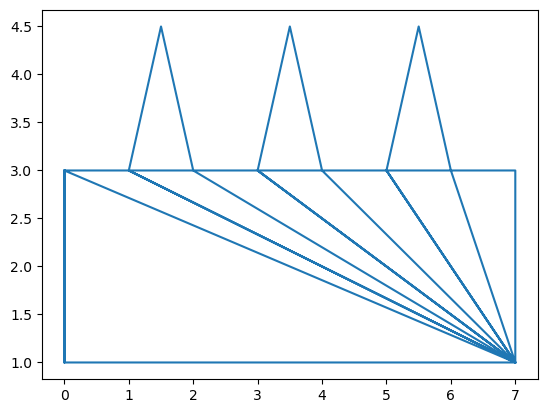

In [44]:
'''n=13'''
polygon=[[0,1],[7,1],[7,3],[6,3],[5.5,4.5],[5,3],[4,3],[3.5,4.5],[3,3],[2,3],[1.5,4.5],[1,3],[0,3]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

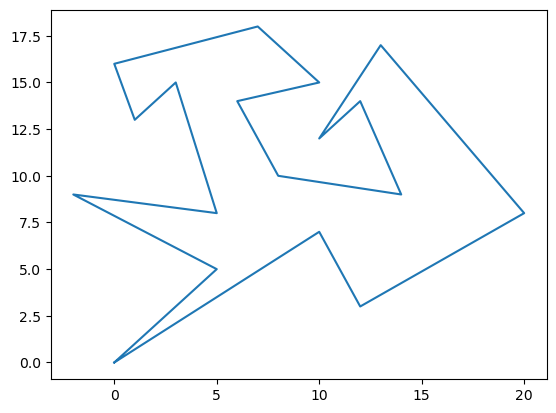



Total list of triangles is : [[[10, 7], [12, 3], [20, 8]], [[13, 17], [10, 12], [12, 14]], [[20, 8], [13, 17], [12, 14]], [[20, 8], [12, 14], [14, 9]], [[10, 7], [20, 8], [14, 9]], [[10, 7], [14, 9], [8, 10]], [[6, 14], [10, 15], [7, 18]], [[0, 16], [1, 13], [3, 15]], [[7, 18], [0, 16], [3, 15]], [[6, 14], [7, 18], [3, 15]], [[8, 10], [6, 14], [3, 15]], [[10, 7], [8, 10], [3, 15]], [[10, 7], [3, 15], [5, 8]], [[10, 7], [5, 8], [-2, 9]], [[10, 7], [-2, 9], [5, 5]], [[0, 0], [10, 7], [5, 5]]]


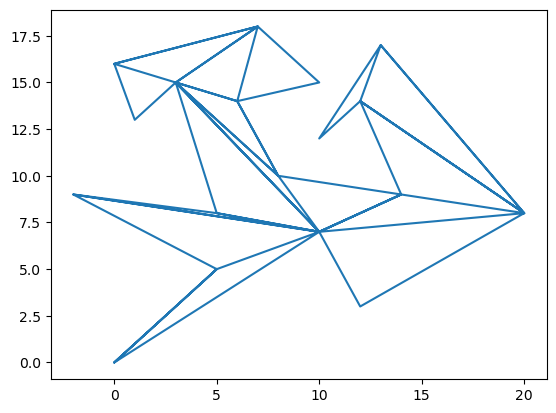

In [45]:
'''n=18'''
polygon=[[0,0],[10,7],[12,3],[20,8],[13,17],[10,12],[12,14],[14,9],[8,10],[6,14],[10,15],[7,18],[0,16],[1,13],[3,15],[5,8]
         ,[-2,9],[5,5]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

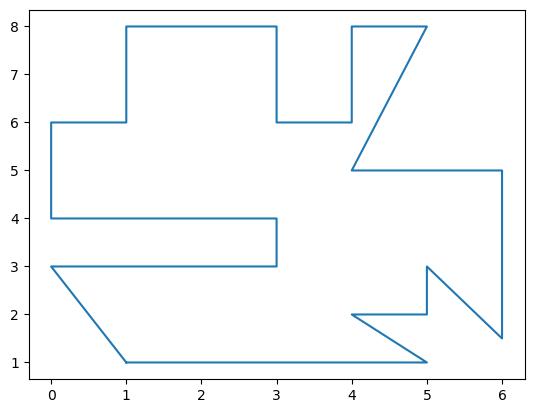



Total list of triangles is : [[[4, 2], [5, 2], [5, 3]], [[5, 3], [6, 1.5], [6, 5]], [[4, 2], [5, 3], [6, 5]], [[4, 2], [6, 5], [4, 5]], [[5, 8], [4, 8], [4, 6]], [[4, 5], [5, 8], [4, 6]], [[4, 5], [4, 6], [3, 6]], [[4, 2], [4, 5], [3, 6]], [[3, 6], [3, 8], [1, 8]], [[3, 6], [1, 8], [1, 6]], [[1, 6], [0, 6], [0, 4]], [[3, 6], [1, 6], [0, 4]], [[3, 6], [0, 4], [3, 4]], [[4, 2], [3, 6], [3, 4]], [[4, 2], [3, 4], [3, 3]], [[4, 2], [3, 3], [0, 3]], [[4, 2], [0, 3], [1, 1]], [[5, 1], [4, 2], [1, 1]]]


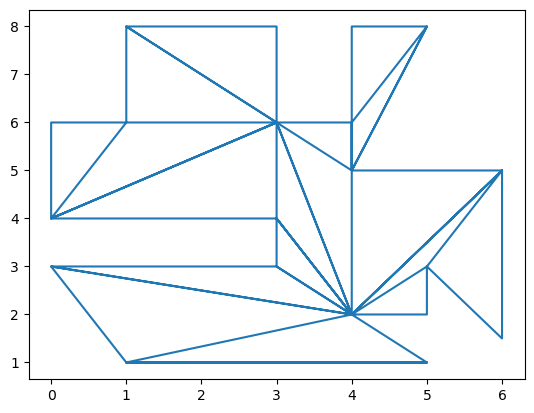

In [46]:
'''n=20'''
polygon=[[1,1],[5,1],[4,2],[5,2],[5,3],[6,1.5],[6,5],[4,5],[5,8],[4,8],[4,6],[3,6],
         [3,8],[1,8],[1,6],[0,6],[0,4],[3,4],[3,3],[0,3]]
num_vertices.append(len(polygon))
polygoncopy = copy.deepcopy(polygon)
polygoncopy.append(polygoncopy[0])
plotpolygon(polygoncopy)
start=time.time()
triangle=triangulate(polygon)
end=time.time()
times=end-start
time_taken.append(times)


plotpolygon(triangle)

[6, 10, 13, 18, 20]
[0.0, 0.0, 0.0, 0.0009965896606445312, 0.015006780624389648, 0.015624761581420898]


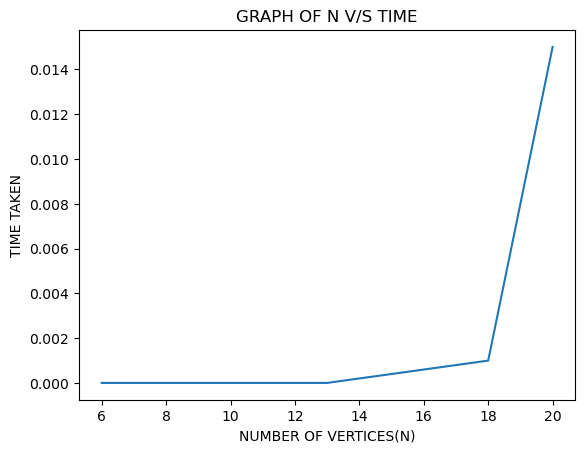

In [47]:
print(num_vertices)
print(time_taken)
ordered_pair=[]
for i in range(len(num_vertices)):
    k=[num_vertices[i],time_taken[i]]
    ordered_pair.append(k)
ordered_pair
xs, ys = zip(*ordered_pair)
plt.plot(xs,ys) 
plt.title('GRAPH OF N V/S TIME')
plt.xlabel('NUMBER OF VERTICES(N)')
plt.ylabel('TIME TAKEN')
plt.show()